In [84]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

import seaborn as sns

# HAM10000

In [72]:
dataset = "HAM10000"

In [73]:
exp_list = [1, 2, 4, 6, 8, 12, 16]

softmax_ham_mean = np.array([84.63, 78.88, 53.30, 62.10, 60.54, 69.42, 63.93])
softmax_ham_std = np.array([3.88, 1.81, 10.30, 9.11, 8.43, 1.38, 1.27])
ova_ham_mean = np.array([83.46, 87.26, 58.20, 69.89, 52.18, 50.59, 67.29])
ova_ham_std = np.array([0.56, 2.93, 16.48, 12.32, 5.82, 12.63, 4.49])

max_std = max(max(softmax_ham_std), max(ova_ham_std))

In [86]:
cmap = sns.color_palette("deep")
ova_plot_args = {"alpha": 0.5,
                 "marker": "o",
                 "color": cmap[0],
                 "linestyle": "dotted"}

softmax_plot_args = {"alpha": 0.5,
                     "marker": "s",
                     "color": cmap[1],
                     "linestyle": "dashed"}

HAM10000 | OvA 1 expert: Mean 83.46 \ Std 0.56 \ Markersize 20.679611650485437
HAM10000 | OvA 2 expert: Mean 87.26 \ Std 2.93 \ Markersize 23.55582524271845
HAM10000 | OvA 4 expert: Mean 58.2 \ Std 16.48 \ Markersize 40.0
HAM10000 | OvA 6 expert: Mean 69.89 \ Std 12.32 \ Markersize 34.95145631067961
HAM10000 | OvA 8 expert: Mean 52.18 \ Std 5.82 \ Markersize 27.063106796116507
HAM10000 | OvA 12 expert: Mean 50.59 \ Std 12.63 \ Markersize 35.32766990291262
HAM10000 | OvA 16 expert: Mean 67.29 \ Std 4.49 \ Markersize 25.449029126213592
HAM10000 | Softmax 1 expert: Mean 84.63 \ Std 3.88 \ Markersize 24.70873786407767
HAM10000 | Softmax 2 expert: Mean 78.88 \ Std 1.81 \ Markersize 22.196601941747574
HAM10000 | Softmax 4 expert: Mean 53.3 \ Std 10.3 \ Markersize 32.5
HAM10000 | Softmax 6 expert: Mean 62.1 \ Std 9.11 \ Markersize 31.05582524271845
HAM10000 | Softmax 8 expert: Mean 60.54 \ Std 8.43 \ Markersize 30.230582524271846
HAM10000 | Softmax 12 expert: Mean 69.42 \ Std 1.38 \ Markersiz

Text(0.5, 1.0, 'HAM10000')

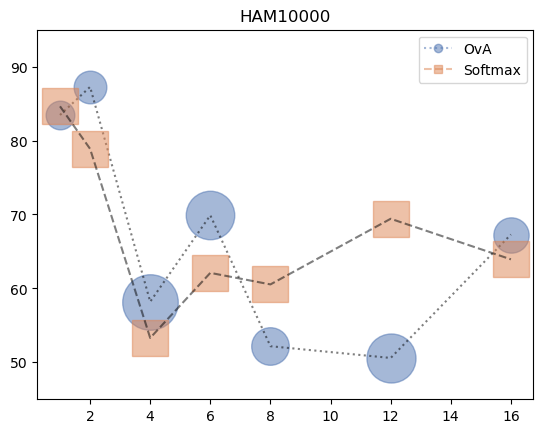

In [88]:


markersize = 20
marker_offset = 20
ova_size = marker_offset + markersize * (ova_ham_std[i] / max_std)

# OvA
for i, e in enumerate(exp_list):
    ova_size = marker_offset + markersize * (ova_ham_std[i] / max_std)
    print("{} | OvA {} expert: Mean {} \ Std {} \ Markersize {}".format(dataset, e, ova_galaxy_mean[i], ova_ham_std[i], ova_size))
    plt.plot(exp_list[i],ova_galaxy_mean[i], markersize=ova_size, **ova_plot_args)
plt.plot(exp_list,ova_galaxy_mean, color="black", linestyle="dotted", alpha=0.5)

# Softmax
for i, e in enumerate(exp_list):
    softmax_size = marker_offset + markersize * (softmax_ham_std[i] / max_std)
    print("{} | Softmax {} expert: Mean {} \ Std {} \ Markersize {}".format(dataset, e, softmax_galaxy_mean[i], softmax_ham_std[i], softmax_size))
    plt.plot(exp_list[i], softmax_galaxy_mean[i], markersize=ova_size, **softmax_plot_args)
plt.plot(exp_list, softmax_galaxy_mean, color="black", linestyle="dashed", alpha=0.5)

plt.ylim([45, 95])
ova_leg = mlines.Line2D([], [], label="OvA", **ova_plot_args)
softmax_leg = mlines.Line2D([], [], label="Softmax", **softmax_plot_args)
plt.legend(handles=[ova_leg, softmax_leg], loc="best")
plt.title("{}".format(dataset))

In [66]:
exp_list[i]

16